Ce Notebook à été construit en avril 2023. Il est possible que certaine étapes ne fonctionne plus d'un certain moment.

Dans les choses qui ont plus de chance de changer, consiste à l'instalation de Selenium et de son utilisation(incluant possiblement le format de la page google).

# GPU

Pour faire du deep learning, il faut des cartes graphiques(GPU : graphical processing unit). Les cartes graphiques permettent de faire plus de calculs en même temps. Ceci est utiliser dans les modèle de deep learning où il y a beaucoup de multiplication matricielle.

Une analogie pour mieux comprendre pourquoi les cartes graphiques sont utiles pour faire de deep learning : 

- CPU : voiture de course (on peut aller rapidement quelque part)
- GPU : un autobus (c'est plus lent, mais on est capable de transporter plus de personnes) 

Donc le GPU et bien pour calculer plusieurs chose en même temps qui n'ont pas besoin de voir ce qui se passe. C'est un peu similaire pour les graphiques dans les jeux vidéo où pour les objets en 3D soit le plus réaliste, on les représente avec une grande quantité de triangles. Par contre, pour dessiner ces triangles, on peut les faire indépendament. Même chose pour le deep learning, certaine partie du calculs peut être fait de manière indépendante des autres partie. Ce qui permet d'utiliser les carte graphiques pour le deep learning.

Pour bien faire le tutoriel, il faut donc utiliser des carte graphique. Heureursement, google colab nous donne accès à des cartes graphique gratuitement. Pour activer une carte graphique dans le colab, 
- aller dans l'onglet Runtime
 - aller dans l'onglet Change Runtime type
   - dans Hardware accelerator, selectionner GPU ou TPU

Vous pouvez vérifié que le GPU est bien présent en executant la ligne qui suit 

Vous devriez avoir quelque chose qui ressemble à (image de stackoverflow)

![nvidia-smi](https://i.stack.imgur.com/C1UNZ.png)


In [ ]:
!nvidia-smi

Tue Apr 11 11:26:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Installation de Selenium

Nous voulons utiliser la librairie Selenium pour télécharger les images sur internet à partir des images des la recherche google.

Par contre, pour utiliser Selenium sur google colab, il y a quelques étapes qui sont nécessaire.

Nous allons suivre les étapes qui sont présente dans le blog post suivant.

https://dataguru.cc/step-by-step-guide-to-install-selenium-in-google-colab/

In [ ]:
!pip install -q selenium

In [ ]:
%%shell

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

Executing: /tmp/apt-key-gpghome.XIG6T0VsLJ/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.vD8tkEl5lO/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.XeH9uUNLz6/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [ ]:
!apt-get update;
!apt-get install chromium chromium-driver;

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://deb.debian.org/debian buster InRelease
Hit:5 http://deb.debian.org/debian buster-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:7 http://deb.debian.org/debian-security buster/updates InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 336 kB in 

In [ ]:
from selenium import webdriver
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

Executer la cellule suivante. Si l'instalation fonctionne, il ne devrait pas avoir d'erreurs.



In [ ]:
driver = web_driver()

driver.get('https://www.google.com')

driver.quit()

# Collecte des images

Pour faire du machine learning, nous avons besoin de donnée. Dans ce cas-ci, les données que nous avons besoins sont des images.

Nous allons utiliser Selenium pour télécharger les images. Vous n'avez pas à comprendre cette partie du code pour l'atelier. Il vous faut juste utiliser les fonctions qui sont présenter.

Executer les prochaine cellules pour que nous ayons les fonctions pour pouvoir télécharger les données.

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

import requests
from PIL import Image
from io import BytesIO
import os

In [ ]:
def get_site_link(search_term:str, driver):
  try:
    driver.set_page_load_timeout(10)
    driver.get(f"https://www.google.com/search?q={search_term}&tbm=isch")
  except TimeoutException:
    print("Timed out waiting for page to load")
    return []
  site_elements = driver.find_elements(By.CSS_SELECTOR, 'a')
  site_urls = [site_element.get_attribute("href") for site_element in site_elements]
  site_urls = [site_url for site_url in site_urls if site_url]
  site_urls = [site_url for site_url in site_urls if 'google' not in site_url]
  return site_urls


In [ ]:
def get_image_urls_from_page(site:str, driver):
  try:
    driver.set_page_load_timeout(10)
    driver.get(site)
    image_elements = driver.find_elements(By.CSS_SELECTOR, 'img')
    image_urls = [image_element.get_attribute("src") for image_element in image_elements]
    image_urls = [image_url for image_url in image_urls if image_url]
    image_urls = [image_url for image_url in image_urls if image_url.split('.')[-1] in ['png', 'jpg']]
    return image_urls
  except TimeoutException:
    print("Timed out waiting for page to load")
  return []

In [ ]:
def save_image(image_url, search_term):
  response = requests.get(image_url)

  if response.status_code == 200:
      img = Image.open(BytesIO(response.content))
      width, height = img.size
      
      if width >= 200 and height >= 200:
          filename = image_url.split('/')[-1]
          
          with open(f'raw_data/{search_term}/{filename}', 'wb') as f:
              f.write(response.content)
          print(f'The image has been saved with size {width} x {height}')
      else:
          print('The image size is too small')
  else:
      print('The image could not be downloaded')


In [ ]:
def obtain_images(search_term:str, driver):
  site_urls = get_site_link(search_term, driver)
  os.makedirs(f'raw_data/{search_term}', exist_ok = True)
  for site_url in site_urls:
    try:
      image_urls = get_image_urls_from_page(site_url, driver)
      for url in image_urls:
        try:
          save_image(url, search_term)
        except Exception as e:
          print(f'was not able to save the image {e}')
    except:
      print('not able to have image from that link')


In [ ]:
driver = web_driver()


Maintenant, il faut que vous choissiez la tâches que vous voulez faire. Nous voulons faire un classificateur d'image. Il faut donc des classes pour nos images. 

Choissisez deux classes d'images. Par exemple, 'cats' et 'dogs'. Modifier la cellule qui suit pour donner le nom de vos deux classes. Ce nom sera utiliser dans une recherche sur google pour aller chercher des pages web avec des images sur la classe que vous avez choisie.

In [ ]:
classe1 = "cats"
classe2 = "dogs"

Executer, les deux prochaine cellule pour télécharger des images. Si cela prend trop de temps, vous pourvez arrêter la cellule. Par contre, assurer vous qu'il y ait suffisament d'image que vous avez enregistrer.

S'il y a vraiement trop de problème avec les données. Vous pouvez télécharger des données d'un dataset.

https://www.kaggle.com/datasets/jessicali9530/caltech256

Vous pouvez aussi montez un drive avec 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil


original_path = 'drive/MyDrive/jules perso presentation/montreal python/tuto/data'
target_path = 'clean_data'

shutil.copytree(original_path, target_path)

Mounted at /content/drive


'clean_data'

In [ ]:
obtain_images(classe1, driver)

The image size is too small
The image size is too small
The image size is too small
The image size is too small
The image size is too small
The image size is too small
The image size is too small
The image size is too small
The image size is too small
The image size is too small
The image size is too small
The image has been saved with size 220 x 255
The image has been saved with size 220 x 239
The image size is too small
The image size is too small
The image size is too small
The image size is too small
The image has been saved with size 220 x 293
The image size is too small
The image size is too small
The image size is too small
The image size is too small
The image has been saved with size 220 x 220
The image size is too small
The image size is too small
The image size is too small
The image has been saved with size 220 x 235
The image size is too small
The image size is too small
The image size is too small
The image size is too small
The image size is too small
The image size is t

not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link


not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link
not able to have image from that link


In [ ]:
obtain_images(classe2, driver)

MaxRetryError: ignored

# Machine learning (apprentissage automatique)

Le machine learning consiste à apprendre des fonctions qui représente bien des données. 

Il existe 3 types de machine learning 

- superviser : on dit à l'ordinateur ce qu'est la bonne réponse
- non-superviser : on ne dit pas ce qu'est la bonne réponse
- renforcement : te récompense pour une bonne note à l'examen, mais tu ne sais pas où tu a eu une mauvaise note.

Donc si on a des donnée, on veut fitter la meilleur courbe avec les donneés (ref : https://machinelearningmastery.com/curve-fitting-with-python/)

![curve fitting](https://machinelearningmastery.com/wp-content/uploads/2020/10/Plot-of-Fifth-Degree-Polynomial-Fit-to-Economic-Dataset.png)

# Deep learning (apprentissage profond)

Le deep learning est une type de machine learning qui apprend des fonctions paramétriques avec beaucoup de paramètre.

(ref : freecodecamp)

![deep learning](https://cdn-media-1.freecodecamp.org/images/1*1mpE6fsq5LNxH31xeTWi5w.jpeg)

Le deep learning est devenu populaire ces dernières années. Ce sont ce genre de modèle qui par exemple est utiliser sur chatGPT.

Ces modèles sont souvent performant avec des images ou du texte.

Traditionnelement, il faut beaucoup de données pour faire ces modèles de machine learning. car ils ont beaucoup de paramètres. Par contre, comme nous allons voir ces dernière années certaine techniques permettent de faire malgré tout des modèle avec peu de données.

# CNN (convolutional neural network)

Les cnn sont des réseau de neuronne qui sont souvent utiliser pour fiare du machine learning sur des images. 

Cela consiste à passer des kernels le long de l'image qui detecte certaine chose(par exemple, les frontière entre objets). (ref : wikipedia)

![cnn](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)


# Finetuning et pretrain 

Les modèles préentrainer sont des modèles qui ont été entrainer sur d'autres tâches précédentes. La plupart des modèle préentrainer de base ont été entrainer sur le dataset de ImageNet qui est un dataset d'image d'objet/chose/animal courent de la vie.  

Finetuning consiste a prendre un modèle préentrainer et commencer l'apprentissage à partir des poids que ce précédent entrainement a donner.

Cela permet de pouvoir faire des modèle de deep learning avec beaucoup moins de données.



# Fonction d'activation (optionel)

La fonction d'activation est une fonction qui ajoute une non-linéarité à votre modèle.

Si que faire une combinaison de fonction linéaires, cela donnerait encore une fonction linéaire. Mais on veut que nos modèle de deep learning soit mieux qu'une simple fonction linéaire.

Donc on rajoute des fonctions non-linaire. Une fonction qui a été longtemp utilis est la sigmoid. On peut voir cela un peu comme une activation d'un neuronne. (ref: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

![sigmoid](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

Une autre fonction d'activation qui est maintenant populaire puisqu'elle donne souvent de bon résultat est la relu. (ref : https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)

![relu](https://machinelearningmastery.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png)

La sigmoid est souvent encore utiliser à la fin d'un réseau de neuronne. Supposons que l'on veut que le modèle choissent entre deux possibilité, c'est souvent une bonne option. On voit que cela varie entre 0 et 1. Donc au dessus de 0.5 c'est une classe et en dessous c'est une autre.

# Modèle de base

Nous allons faire un modèle de base pour tester le machine learning.

La première chose que vous deviez faire c'est séparer vos données en train, valid et test.

Question : Créer les nouveaux dossiers raw_train, raw_valid, raw_test.

Séparé vos donnés dans raw_data de manière alléaloire dans train, valid et test. Dans chaque dossier, vous aller avoir les dossier avec les même nom que dans raw_data (par exemples 'cats' et 'dogs')

Sub-question : quel pourcentage pourrait faire du sens de mettre dans chaque categorie(train, valid, test)?


In [ ]:
from sklearn.model_selection import train_test_split
import shutil

classes = os.listdir('raw_data')

for class_name in classes:
    # Define the path to the class directory
    class_dir = os.path.join('raw_data', class_name)
    
    # Get the list of image filenames in the class directory
    image_filenames = os.listdir(class_dir)

    train_filenames, test_filenames = train_test_split(image_filenames, test_size=0.2)
    valid_filenames, test_filenames = train_test_split(test_filenames, test_size=0.5)

    train_dir = os.path.join('raw_train', class_name)
    valid_dir = os.path.join('raw_valid', class_name)
    test_dir = os.path.join('raw_test', class_name)
    os.makedirs(train_dir, exist_ok = True)
    os.makedirs(valid_dir, exist_ok = True)
    os.makedirs(test_dir, exist_ok = True)

    for filename in train_filenames:
        src_path = os.path.join(class_dir, filename)
        dst_path = os.path.join(train_dir, filename)
        shutil.copy(src_path, dst_path)
    for filename in valid_filenames:
        src_path = os.path.join(class_dir, filename)
        dst_path = os.path.join(valid_dir, filename)
        shutil.copy(src_path, dst_path)
    for filename in test_filenames:
        src_path = os.path.join(class_dir, filename)
        dst_path = os.path.join(test_dir, filename)
        shutil.copy(src_path, dst_path)


Pour le modèle de base

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,      # rescale pixel values to [0, 1]
)

# Load the training and validation data from the directories
train_generator = datagen.flow_from_directory(
    'raw_train',       # path to the training data
    target_size=(128, 128), # resize the images to (128, 128)
    batch_size=32,      # number of images to process at a time
    class_mode='binary' # binary classification
)

test_generator = datagen.flow_from_directory(
    'raw_valid',        # path to the validation data
    target_size=(128, 128), # resize the images to (128, 128)
    batch_size=32,      # number of images to process at a time
    class_mode='binary' # binary classification
)

# Load the pre-trained model and freeze its layers
base_model = tf.keras.applications.VGG16(include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add your own classifier on top of the pre-trained model
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

Found 334 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Epoch 1/10
 5/11 [============>.................] - ETA: 2s - loss: 1.5857 - accuracy: 0.4750

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/11 [==============================] - 12s 973ms/step - loss: 1.1340 - accuracy: 0.4611 - val_loss: 0.7040 - val_accuracy: 0.4524
Epoch 2/10
11/11 [==============================] - 7s 693ms/step - loss: 0.6557 - accuracy: 0.6647 - val_loss: 0.6316 - val_accuracy: 0.7619
Epoch 3/10
11/11 [==============================] - 5s 455ms/step - loss: 0.6002 - accuracy: 0.7545 - val_loss: 0.6014 - val_accuracy: 0.5714
Epoch 4/10
11/11 [==============================] - 5s 504ms/step - loss: 0.5508 - accuracy: 0.7695 - val_loss: 0.5336 - val_accuracy: 0.8095
Epoch 5/10
11/11 [==============================] - 8s 714ms/step - loss: 0.5028 - accuracy: 0.7784 - val_loss: 0.5018 - val_accuracy: 0.8095
Epoch 6/10
11/11 [==============================] - 8s 722ms/step - loss: 0.4318 - accuracy: 0.8443 - val_loss: 0.4900 - val_accuracy: 0.7857
Epoch 7/10
11/11 [==============================] - 5s 460ms/step - loss: 0.3789 - accuracy: 0.8713 - val_loss: 0.4835 - val_accuracy: 0.7619
Epoch 8/10
11/11

Question : Trouver la fonction qui permet de printer un résumé du modèle.

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

Question : Qu'est qu'il faut faire dans tout projet de machine learning et que nous avons pas fait? 

R : Regarder les données. Il faut regarder nos donnée. Vous pouvez les voir sur le coté dans vos fichier. Vos données sont dans le dossier raw_data.

Question : Est-ce que vous remarquer quelque chose de spécifique sur vos données? 

R : Vous devriez ne pas avoir uniquement des images de la classe que nous cherchions. C'est en partie parce que le code de selenium que nous avons fait n'est pas parfait. Mais dans tout les cas, dans un projet de machine learning, il y aura toujours des erreurs dans vos donneés. Il faut donc netoyer vos données. C'est que nous feront dans la prochaine section.

# Netoyage de données.

Nous allons utiliser un code qui vous permet de regarder les données que vous avez et de les saugarder dans une autre dossier qui sera vos dataset propre. 

Vous n'avez pas à comprendre le code de cette section pour l'atelier. Donc executer les cellules qui suivent pour créer les fonctions qui nous permetrons de netoyer les données.

In [ ]:

import os
import shutil
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image
from IPython.display import clear_output

In [ ]:
search_term = 'cats'
path = f'raw_data/{search_term}'
image_files = [f for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

In [ ]:
def show_image(file):
    image_path = os.path.join(path, file)
    with image_output:
        clear_output(wait=True)  # Clear the previous image
        display(Image(filename=image_path))
    
    with buttons_output:
        clear_output(wait=True)  # Clear the previous buttons
        save_button = widgets.Button(description='Save')
        cancel_button = widgets.Button(description='Delete')

        display(save_button)
        display(cancel_button)


        def save_image(b):
            save_path = f'clean_data/{search_term}'
            os.makedirs(save_path, exist_ok = True)
            save_file = os.path.join(save_path, file)
            shutil.copy2(image_path, save_file)
            print('Image saved to clean dataset: ' + save_file)
        def cancel(b):
            save_path = f'clean_data/{search_term}'
            save_file = os.path.join(save_path, file)
            if os.path.isfile(save_file):
              os.remove(save_file)
              print('Image deleted from the clean dataset:'+save_file)
            else:
              print('image was already not present in the clean dataset')
        
        save_button.on_click(save_image)
        cancel_button.on_click(cancel)

In [ ]:
def next_image(b):
  global image_index
  image_index = (image_index + 1) % len(image_files)
  show_image(image_files[image_index])

def previous_image(b):
  global image_index
  image_index = (image_index - 1) % len(image_files)
  show_image(image_files[image_index])

Maintenant, dans la prochaine cellule écriver le nom d'une des classes que vous avez créer. Et ensuite execeuter la cellule et celle qui suit.

Vous devriez voir une image avez les option de sauvegarder l'image, de l'enlever, de passer à la prochaine image, de voir l'image précédente.

La sauvegarde et enlever l'image se fait sur le dataset clean que vous avez. De plus, il y a un bug(je ne sais pas pourquoi) qui fait que lorsque l'on change d'image vous ne voyez plus l'option delete. Par contre, si vous réexcuter la cellule elle devrait réapraitre(et vous devriez rester sur la même image).

Une fois que vous avez fini de netoyer une classe(ou que vous avez suffisament d'images), vous pouvez commencer la deuxième en changant le terme chercher par le nom de la deuxième classe et réexecuter les deux cellules qui suivent.

In [ ]:
search_term = 'cats'
image_index = 0

In [ ]:
path = f'raw_data/{search_term}'
os.makedirs(f'clean_data/{search_term}', exist_ok = True)
image_files = [f for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

next_button = widgets.Button(description='Next Image')
next_button_output = widgets.Output()
with next_button_output:
    display(next_button)
display(next_button_output)

previous_button = widgets.Button(description='previous Image')
previous_button_output = widgets.Output()
with previous_button_output:
    display(previous_button)
display(previous_button_output)

# Create outputs for the image and buttons
image_output = widgets.Output()
buttons_output = widgets.Output()
display(image_output, buttons_output)


next_button.on_click(next_image)
previous_button.on_click(previous_image)
show_image(image_files[image_index])

Output()

Output()

Output()

Output()

Image deleted from the clean dataset:clean_data/cats/grooming-your-pet-list.jpg


# entrainement avec les données netoyer

Nous allons maintenant faire l'entrainement avec les données netoyer.

La première chose à faire c'est de séparé en train, valid et test notre nouveau dataset.

In [2]:
from sklearn.model_selection import train_test_split
import shutil

classes = os.listdir('clean_data')
classes = [class_name for class_name in classes if '.' not in class_name]

for class_name in classes:
    # Define the path to the class directory
    class_dir = os.path.join('clean_data', class_name)
    
    # Get the list of image filenames in the class directory
    image_filenames = os.listdir(class_dir)

    train_filenames, test_filenames = train_test_split(image_filenames, test_size=0.2)
    valid_filenames, test_filenames = train_test_split(test_filenames, test_size=0.5)

    train_dir = os.path.join('clean_train', class_name)
    valid_dir = os.path.join('clean_valid', class_name)
    test_dir = os.path.join('clean_test', class_name)
    os.makedirs(train_dir, exist_ok = True)
    os.makedirs(valid_dir, exist_ok = True)
    os.makedirs(test_dir, exist_ok = True)

    for filename in train_filenames:
        src_path = os.path.join(class_dir, filename)
        dst_path = os.path.join(train_dir, filename)
        shutil.copy(src_path, dst_path)
    for filename in valid_filenames:
        src_path = os.path.join(class_dir, filename)
        dst_path = os.path.join(valid_dir, filename)
        shutil.copy(src_path, dst_path)
    for filename in test_filenames:
        src_path = os.path.join(class_dir, filename)
        dst_path = os.path.join(test_dir, filename)
        shutil.copy(src_path, dst_path)

On peut ensuite entrainer notre notre modèle avec ces données qui sont plus propres.

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,      # rescale pixel values to [0, 1]
)

# Load the training and validation data from the directories
train_generator = datagen.flow_from_directory(
    'clean_train',       # path to the training data
    target_size=(128, 128), # resize the images to (128, 128)
    batch_size=32,      # number of images to process at a time
    class_mode='binary' # binary classification
)

test_generator = datagen.flow_from_directory(
    'clean_valid',        # path to the validation data
    target_size=(128, 128), # resize the images to (128, 128)
    batch_size=32,      # number of images to process at a time
    class_mode='binary' # binary classification
)

# Load the pre-trained model and freeze its layers
base_model = tf.keras.applications.VGG16(include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add your own classifier on top of the pre-trained model
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

Found 219 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
7/7 [==============================] - 16s 663ms/step - loss: 0.7240 - accuracy: 0.6986 - val_loss: 0.1038 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 1s 96ms/step - loss: 0.1359 - accuracy: 0.9452 - val_loss: 0.0525 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 1s 118ms/step - loss: 0.0818 - accuracy: 0.9589 - val_loss: 0.0677 - val_accuracy: 0.9286
Epoch 4/10
7/7 [==============================] - 1s 138ms/step - loss: 0.0348 - accuracy: 0.9909 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 1s 139ms/step - loss: 0.0257 - accuracy: 0.9954 - val_loss: 0.0360 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 1s 125ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 7/10
7/7

# Data augmentation

Bien que nous pouvons entrainer avec peu de données grâce au finetuning, il est toujours mieux d'avoir plus de données(à condition que ce sont de bonne données).

Il existe une technique simple pour crée plus de données à partir d'un dataset que nous avons déjà. 

C'est l'augementation de données(data augmentation). Cela consiste à modifier nos données tout en sachant que le ne change pas la classe de ce que nous avons. 

Un exemple simple consiste à flipper une image honrizontalement. Dans la majorité des cas, cela ne devrait pas changer la classe de ce que notre modèle essaie de déterminer. 

Par exemple, si on flip une image de chien, cela reste une image de chien. Par contre, il faut garder en mémoire que ce n'est pas toujours le cas. par exemple si vous avez une image de main droite et que vous la fliper honrizontalement, cela donne un main gauche. 

Donc il existe différentes transformations possibles pour créer de nouvelles données : flip, rotation, zoom, ...

Par contre, on pourrait créer un gros dataset si on enrigistre une image pour chaque transformation. Une solution simple que les libraries de deep learning permettent c'est de modifié les images avant de les donner au modèle de machine learning. Ainsi c'est comme si on avait un dataset plus grand, car à chaque époque on ne voit pas exactement les même images.

Question : Modifier le generateur pour le training set pour inclure du data augmentation de flip horizontal, zoom, shear et de rotation. Ensuite, réentrainer votre modèle.

![shear](https://en.wikipedia.org/wiki/Shear_mapping#/media/File:SVG_skewX.svg)

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,      # rescale pixel values to [0, 1]
    shear_range=0.2,     # apply shear transformation
    zoom_range=0.2,      # apply zoom transformation
    horizontal_flip=True, # flip images horizontally
    rotation_range=30  # add rotation angles between 0 and 30 degrees
)

test_datagen = ImageDataGenerator(
    rescale=1./255,      # rescale pixel values to [0, 1]
)

# Load the training and validation data from the directories
train_generator = train_datagen.flow_from_directory(
    'clean_train',       # path to the training data
    target_size=(128, 128), # resize the images to (128, 128)
    batch_size=32,      # number of images to process at a time
    class_mode='binary' # binary classification
)

test_generator = test_datagen.flow_from_directory(
    'clean_valid',        # path to the validation data
    target_size=(128, 128), # resize the images to (128, 128)
    batch_size=32,      # number of images to process at a time
    class_mode='binary' # binary classification
)

# Load the pre-trained model and freeze its layers
base_model = tf.keras.applications.VGG16(include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add your own classifier on top of the pre-trained model
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

Found 219 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Epoch 1/10
7/7 [==============================] - 3s 214ms/step - loss: 0.5239 - accuracy: 0.7854 - val_loss: 0.1375 - val_accuracy: 0.9286
Epoch 2/10
7/7 [==============================] - 1s 188ms/step - loss: 0.2495 - accuracy: 0.9041 - val_loss: 0.0511 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 1s 195ms/step - loss: 0.2070 - accuracy: 0.9178 - val_loss: 0.0438 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 1s 188ms/step - loss: 0.1140 - accuracy: 0.9635 - val_loss: 0.0764 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 2s 292ms/step - loss: 0.0929 - accuracy: 0.9772 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 2s 341ms/step - loss: 0.0644 - accuracy: 0.9726 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 2s 271ms/step - loss: 0.0402 

# La performance sur le test set

Pour regarder si un modèle généralise bien, il est bien de regarder s'il se généralise sur de nouvelles données.

Question : caculer l'accuracie sur le test set

In [6]:
real_test_generator = test_datagen.flow_from_directory(
    'clean_test',        # path to the validation data
    target_size=(128, 128), # resize the images to (128, 128)
    batch_size=32,      # number of images to process at a time
    class_mode='binary' # binary classification
)

model.evaluate_generator(real_test_generator)

Found 28 images belonging to 2 classes.


<ipython-input-6-4f6b4a7b93fe>:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(real_test_generator)


[0.3113427758216858, 0.8571428656578064]

In [ ]:
real_test_generator = test_datagen.flow_from_directory(
    'clean_test',        # path to the validation data
    target_size=(128, 128), # resize the images to (128, 128)
    batch_size=32,      # number of images to process at a time
    class_mode='binary' # binary classification
)

Found 28 images belonging to 2 classes.


Maintenant, pour avoir plus de détails, est-ce que vous pouvez obtenir la matrice de confusion.


In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict the labels of the test set data in batches
y_pred = model.predict(real_test_generator)
print(y_pred)

# Convert the one-hot encoded labels to class labels
y_true = real_test_generator.classes
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

1/1 [==============================] - 0s 246ms/step
[[3.1867451e-08]
 [4.9492952e-01]
 [9.9440813e-01]
 [1.6538357e-02]
 [4.3999618e-01]
 [1.9154941e-06]
 [9.9960500e-01]
 [9.9165803e-01]
 [9.9949741e-01]
 [8.1510766e-04]
 [9.9754542e-01]
 [9.9974245e-01]
 [9.8216760e-01]
 [9.9898916e-01]
 [9.9978501e-01]
 [9.9939072e-01]
 [4.3393737e-01]
 [1.1461631e-04]
 [9.9969959e-01]
 [4.2663954e-02]
 [9.9963450e-01]
 [3.4391622e-05]
 [7.3416471e-02]
 [6.2665281e-06]
 [9.9872082e-01]
 [9.7553355e-01]
 [7.9577333e-01]
 [5.4427028e-02]]
[[13  0]
 [15  0]]


In [8]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

# courbe d'apprentissage (learning curve)

Nous allons voir un outil qui permet de regarder quand stoper l'entrainement de nos modèle de deep learning. 

Question : Dessiner la courbe d'apprentissage d'un entrainement. Les fonctions de Keras devrait vous aider.

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
7/7 [==============================] - 5s 625ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.1479 - val_accuracy: 0.9643
Epoch 2/10
7/7 [==============================] - 1s 192ms/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.1412 - val_accuracy: 0.9286
Epoch 3/10
7/7 [==============================] - 1s 191ms/step - loss: 0.0280 - accuracy: 0.9954 - val_loss: 0.1787 - val_accuracy: 0.9643
Epoch 4/10
7/7 [==============================] - 1s 198ms/step - loss: 0.0234 - accuracy: 0.9954 - val_loss: 0.1581 - val_accuracy: 0.9643
Epoch 5/10
7/7 [==============================] - 1s 200ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.1620 - val_accuracy: 0.9643
Epoch 6/10
7/7 [==============================] - 1s 205ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.1887 - val_accuracy: 0.9643
Epoch 7/10
7/7 [==============================] - 2s 269ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.1926 - val_accuracy: 0.9643
Epoch 8/10
7/7 [====

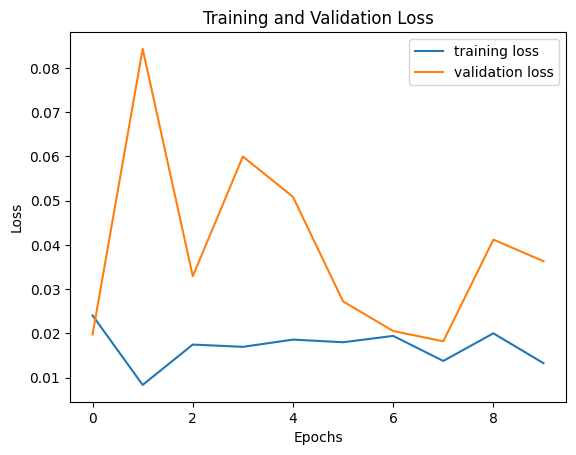

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

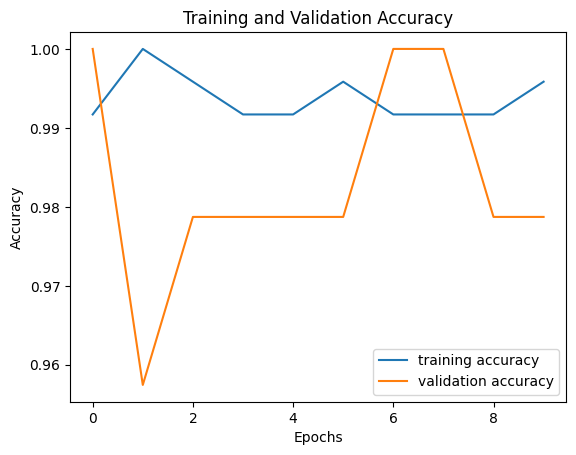

In [ ]:

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

L'idée est que nous voudrons arrêter avant que ce soit fini.

Question : Fait en sorte que le modèle arrête après que vous ayez 3 epoch qui ont toute faite. Mais demander d'entrainer 30 epoch.

In [ ]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

model.fit(train_generator, epochs=30, validation_data=test_generator, callbacks=[early_stop])

Epoch 1/30
8/8 [==============================] - 2s 212ms/step - loss: 0.0306 - accuracy: 0.9834 - val_loss: 0.0299 - val_accuracy: 0.9787
Epoch 2/30
8/8 [==============================] - 2s 204ms/step - loss: 0.0091 - accuracy: 0.9917 - val_loss: 0.0465 - val_accuracy: 0.9787
Epoch 3/30
8/8 [==============================] - 2s 304ms/step - loss: 0.0111 - accuracy: 0.9959 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 4/30
8/8 [==============================] - 2s 288ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 5/30
8/8 [==============================] - 2s 197ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 0.9787
Epoch 6/30
8/8 [==============================] - 2s 233ms/step - loss: 0.0068 - accuracy: 0.9959 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 7/30
8/8 [==============================] - 2s 199ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 8/30
8/8 [====

# Sauvegarder model

Pour pouvoir utiliser 

Ensuite, vous pouvez télécharger le fichier, en allant dans la section fichier 
a gauche. Clique-droit et sauvarger le fichier. Ainsi vous pourez réutiliser le modèle si vous voulez.

Question : sauvegarder votre modèle de machine learning

In [ ]:
model.save('my_model.h5')

# Inférence sur de nouvelle images

Pour faire faire l'inférence(i.e. la prédiction), on aura généralement pas à réentrainer un modèle. 

Question : charger en mémoire le modèle.




In [ ]:
from tensorflow import keras

loaded_model = keras.models.load_model('my_model.h5')

Question : faite l'inférence de votre modèle sur une image.

In [ ]:
image_path = '/content/clean_test/glove/005_0033.jpg'

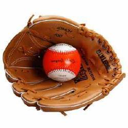

In [ ]:
from PIL import Image
import numpy as np

img = Image.open(image_path).resize((128, 128))
img

In [ ]:
# Convert the image to a numpy array and normalize its values
x = np.array(img) / 255.0

# Reshape the array to have a batch dimension of 1
x = x.reshape((1, 128, 128, 3))

x = test_datagen.flow(x, batch_size=1).next()
y_pred = model.predict(x)
y_pred_class = np.argmax(y_pred)
class_names = list(train_generator.class_indices.keys())
predicted_class_name = class_names[y_pred_class]
predicted_class_name

1/1 [==============================] - 0s 20ms/step


'bat'